In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import ShuffleSplit

from catboost import CatBoostRegressor
from catboost import Pool

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [15]:
!pip install catboost --upgrade

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\skapr\\AppData\\Roaming\\Python\\Python39\\site-packages\\~atboost\\_catboost.pyd'
Check the permissions.



  Attempting uninstall: catboost
    Found existing installation: catboost 1.0.6
    Uninstalling catboost-1.0.6:
      Successfully uninstalled catboost-1.0.6


In [21]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [3]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Краснодар/Выборка_Краснодар.xlsx', sheet_name = 0)
df

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Сцепка_к,Исп.2,Unnamed: 63,Сцепка_3,Д_ад,Д_ya,Сравнение,Поиск,Текст,Ссылка
0,1_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,12000000,...,,NaN,NaN,9,3к2,NaN,NaN,0.0,"Продается отличная, большая, просторная кварти...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
1,2_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3700000,...,39.005982 45.099499,NaN,NaN,11 39.005982 45.099499,13,13,1.0,0.0,Продаётся уютная квартира в шикарном жк Победн...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
2,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,39.036192 45.010981,NaN,3.0,5 39.036192 45.010981,132,132,1.0,0.0,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
3,4_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,12300000,...,,NaN,NaN,4,39/2,NaN,NaN,0.0,Срочная Продажа! Продается большая трехкомнатн...,https://www.avito.ru/krasnodar/kvartiry/3-k._k...
4,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,38.970992 45.101935,NaN,17.0,15 38.970992 45.101935,4/4,4/4,1.0,0.0,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34263,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,39.03868 45.079091,NaN,72.0,4 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10785272/
34264,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,39.043307 45.078162,NaN,32.0,17 39.043307 45.078162,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10541705/
34265,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,39.03868 45.079091,NaN,72.0,17 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10355115/
34266,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,39.03868 45.079091,NaN,72.0,20 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10328304/


In [4]:
df = df[df['All'] == 0]
df = df[df['Прогноз(0.32)'] == 0]
# df = df[df['dup_res'] == 0]
# df = df[df['Выброс_итог'] == 0]

#df = df[df['LN(Цена)'] <= 18]
#df = df[df['LN(Цена)'] >= 14.5]

df.reset_index(drop = True, inplace = True)
df

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Сцепка_к,Исп.2,Unnamed: 63,Сцепка_3,Д_ад,Д_ya,Сравнение,Поиск,Текст,Ссылка
0,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,39.036192 45.010981,NaN,3.0,5 39.036192 45.010981,132,132,1.0,0.0,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
1,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,38.970992 45.101935,NaN,17.0,15 38.970992 45.101935,4/4,4/4,1.0,0.0,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
2,6_avito,0,0,0.0,0.0,0.0,0.0,0.047736,0.952264,3999999,...,38.905658 45.093702,NaN,45.0,9 38.905658 45.093702,39/2,39/2,1.0,0.0,Агентам не Беспокоить. Дешевле чем от застройщ...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
3,9_avito,0,0,0.0,0.0,0.0,0.0,0.018983,0.981017,2850000,...,39.029275 45.097119,NaN,7.0,2 39.029275 45.097119,5к3,5к3,1.0,0.0,"Продажа от собственника, никаких риелтор них к...",https://www.avito.ru/krasnodar/kvartiry/kvarti...
4,10_avito,0,0,0.0,0.0,0.0,0.0,0.028921,0.971079,3400000,...,38.897878 45.077226,NaN,13.0,7 38.897878 45.077226,1/3к7,1/3к7,1.0,0.0,Продаётся уютная студия в ЖК« Светлоград» от с...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,39.03868 45.079091,NaN,72.0,4 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10785272/
12261,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,39.043307 45.078162,NaN,32.0,17 39.043307 45.078162,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10541705/
12262,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,39.03868 45.079091,NaN,72.0,17 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10355115/
12263,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,39.03868 45.079091,NaN,72.0,20 39.03868 45.079091,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10328304/


In [5]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Этаж_4']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

#Если вы используете scikit-learn версии ниже 1.0, вам необходимо использовать get_feature_names метод. 
#Для более новых версий scikit-learn get_feature_names_out будет работать нормально.

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Сравнение,Поиск,Текст,Ссылка,Этаж_4_неважно,Этаж_4_первый,Этаж_4_последний,Этаж_4_этажи_11-25,Этаж_4_этажи_2-5,Этаж_4_этажи_6-10
0,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,1.0,0.0,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...,0.0,0.0,1.0,0.0,0.0,0.0
1,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,1.0,0.0,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...,0.0,0.0,0.0,1.0,0.0,0.0
2,6_avito,0,0,0.0,0.0,0.0,0.0,0.047736,0.952264,3999999,...,1.0,0.0,Агентам не Беспокоить. Дешевле чем от застройщ...,https://www.avito.ru/krasnodar/kvartiry/kvarti...,0.0,0.0,0.0,0.0,0.0,1.0
3,9_avito,0,0,0.0,0.0,0.0,0.0,0.018983,0.981017,2850000,...,1.0,0.0,"Продажа от собственника, никаких риелтор них к...",https://www.avito.ru/krasnodar/kvartiry/kvarti...,0.0,0.0,0.0,0.0,1.0,0.0
4,10_avito,0,0,0.0,0.0,0.0,0.0,0.028921,0.971079,3400000,...,1.0,0.0,Продаётся уютная студия в ЖК« Светлоград» от с...,https://www.avito.ru/krasnodar/kvartiry/kvarti...,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10785272/,0.0,0.0,0.0,0.0,1.0,0.0
12261,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10541705/,0.0,0.0,1.0,0.0,0.0,0.0
12262,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10355115/,0.0,0.0,0.0,1.0,0.0,0.0
12263,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10328304/,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Ремонт_3']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Этаж_4_этажи_11-25,Этаж_4_этажи_2-5,Этаж_4_этажи_6-10,Ремонт_3_без_отделки,Ремонт_3_предчистовая,Ремонт_3_премиальный,Ремонт_3_стандартный,Ремонт_3_требует_ремонта,Ремонт_3_улучшенный,Ремонт_3_экономный
0,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6_avito,0,0,0.0,0.0,0.0,0.0,0.047736,0.952264,3999999,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,9_avito,0,0,0.0,0.0,0.0,0.0,0.018983,0.981017,2850000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10_avito,0,0,0.0,0.0,0.0,0.0,0.028921,0.971079,3400000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12261,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12262,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12263,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Раст_центр_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Ремонт_3_премиальный,Ремонт_3_стандартный,Ремонт_3_требует_ремонта,Ремонт_3_улучшенный,Ремонт_3_экономный,Раст_центр_2_более_10000,Раст_центр_2_до_1000,Раст_центр_2_от_1000_до_3000,Раст_центр_2_от_3000_до_5000,Раст_центр_2_от_5000_до_10000
0,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6_avito,0,0,0.0,0.0,0.0,0.0,0.047736,0.952264,3999999,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9_avito,0,0,0.0,0.0,0.0,0.0,0.018983,0.981017,2850000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10_avito,0,0,0.0,0.0,0.0,0.0,0.028921,0.971079,3400000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12261,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12262,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12263,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['ЖК_БД']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Ремонт_3_улучшенный,Ремонт_3_экономный,Раст_центр_2_более_10000,Раст_центр_2_до_1000,Раст_центр_2_от_1000_до_3000,Раст_центр_2_от_3000_до_5000,Раст_центр_2_от_5000_до_10000,ЖК_БД_нет,ЖК_БД_престижный,ЖК_БД_престижный+
0,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,6_avito,0,0,0.0,0.0,0.0,0.0,0.047736,0.952264,3999999,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,9_avito,0,0,0.0,0.0,0.0,0.0,0.018983,0.981017,2850000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,10_avito,0,0,0.0,0.0,0.0,0.0,0.028921,0.971079,3400000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
12261,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
12262,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
12263,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [9]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Районы_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Районы_2_Поселки_Рубероидный,Районы_2_Российский_Ипподром,Районы_2_Славянский_Микрохирургии_глаза,Районы_2_Фестивальный,Районы_2_ХБК,Районы_2_Центр,Районы_2_Черемушки,Районы_2_Школьный_Табачная_фабрика,Районы_2_Энка,Районы_2_Юбилейный_СХИ_Кожзавод
0,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,6_avito,0,0,0.0,0.0,0.0,0.0,0.047736,0.952264,3999999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9_avito,0,0,0.0,0.0,0.0,0.0,0.018983,0.981017,2850000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10_avito,0,0,0.0,0.0,0.0,0.0,0.028921,0.971079,3400000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12260,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12261,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12262,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12263,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
list(df.columns)

['ID',
 'All',
 'Мусор',
 'Мусор_1',
 'Мусор_2',
 'Прогноз(0.5)',
 'Прогноз(0.32)',
 'pred_proba_2',
 'pred_proba_1',
 'Цена',
 'Цена_перв',
 'LN(Цена)',
 'Цена(кв.м)',
 'Цена_об',
 'Прогноз',
 'Цена(кв.м).1',
 'MAE',
 'MAPE',
 'Выбросы',
 'Исп_2',
 'Исп',
 'Комм',
 'Комнатность',
 'ОПлощадь',
 'Этаж_1',
 'Этаж_2',
 'Этаж_3',
 'Этаж_4',
 'Этажность_1',
 'Этажность_2',
 'Этаж/этажность',
 'ГП_1',
 'ГП_2',
 'Минжкх',
 'П',
 'Аварийный',
 'Ремонт',
 'Ремонт_2',
 'Ремонт_3',
 'Исп.1',
 'Раст_центр_1',
 'Раст_центр_2',
 'Районы_1',
 'Районы_2',
 'ЖК_БД',
 'Многоуровневость',
 'Терраса',
 'Пентхаус',
 'dup_all',
 'dup_1',
 'dup_2',
 'dup_3',
 'dup_4',
 'dup_res',
 'Инфо',
 'Адрес',
 'Unnamed: 56',
 'Адрес_итог',
 'Адрес_Ya',
 'Долгота',
 'Широта',
 'Сцепка_к',
 'Исп.2',
 'Unnamed: 63',
 'Сцепка_3',
 'Д_ад',
 'Д_ya',
 'Сравнение',
 'Поиск',
 'Текст',
 'Ссылка',
 'Этаж_4_неважно',
 'Этаж_4_первый',
 'Этаж_4_последний',
 'Этаж_4_этажи_11-25',
 'Этаж_4_этажи_2-5',
 'Этаж_4_этажи_6-10',
 'Ремонт_

In [18]:
X = df[[
         'ОПлощадь',
         'Этажность_1',
         'ГП_1',
         'Этаж_4_неважно',
         'Этаж_4_первый',
         'Этаж_4_последний',
         'Этаж_4_этажи_11-25',
         'Этаж_4_этажи_2-5',
         'Этаж_4_этажи_6-10',
         'Ремонт_3_без_отделки',
         'Ремонт_3_предчистовая',
         'Ремонт_3_премиальный',
         'Ремонт_3_стандартный',
         'Ремонт_3_требует_ремонта',
         'Ремонт_3_улучшенный',
         'Ремонт_3_экономный',
         'Раст_центр_2_более_10000',
         'Раст_центр_2_до_1000',
         'Раст_центр_2_от_1000_до_3000',
         'Раст_центр_2_от_3000_до_5000',
         'Раст_центр_2_от_5000_до_10000',
         'ЖК_БД_нет',
         'ЖК_БД_престижный',
         'ЖК_БД_престижный+',
         'Районы_2_2_я_Площадка',
         'Районы_2_Авиагородок_9_й_километр_Репино',
         'Районы_2_Аврора',
         'Районы_2_Баскет_холл_Горхутор',
         'Районы_2_Березовый_Северный_Молодёжный',
         'Районы_2_Восточно_Кругликовский_ККБ',
         'Районы_2_Гидростроителей',
         'Районы_2_Горгаз',
         'Районы_2_ЗИП_Московский_40_лет_Победы',
         'Районы_2_Западный_обход',
         'Районы_2_Знаменский_Новознаменский',
         'Районы_2_Комсомольский_КСК_ТЭЦ',
         'Районы_2_Краснодарский_Плодородный',
         'Районы_2_Любимово',
         'Районы_2_Музыкальный',
         'Районы_2_Немецкая_деревня_Колосистый',
         'Районы_2_Панорама',
         'Районы_2_Пашковский',
         'Районы_2_Поселки_Рубероидный',
         'Районы_2_Российский_Ипподром',
         'Районы_2_Славянский_Микрохирургии_глаза',
         'Районы_2_Фестивальный',
         'Районы_2_ХБК',
         'Районы_2_Центр',
         'Районы_2_Черемушки',
         'Районы_2_Школьный_Табачная_фабрика',
         'Районы_2_Энка',
         'Районы_2_Юбилейный_СХИ_Кожзавод',
         'Многоуровневость',
         'Терраса',
       ]]

Y = df['LN(Цена)']

In [19]:
catb = CatBoostRegressor(iterations = 6500, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 5, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         verbose = False,
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций

In [22]:
shuffle_split = ShuffleSplit(n_splits = 5, test_size = 0.05, random_state = 0)

train_sizes, train_scores, test_scores = learning_curve(
                                                        catb,
                                                        X, 
                                                        Y,
                                                        cv = shuffle_split,
                                                        scoring = 'neg_root_mean_squared_error',
                                                        train_sizes = np.linspace(0.05, 0.95, 20, endpoint = True),
                                                        #train_sizes = np.linspace(0.05, 0.95, 20) * 7586,
                                                        #train_sizes = [0.05, 0.1, 0.15, 0.2, 0.25, 
                                                        #               0.3, 0.35, 0.4, 0.45, 0.50, 
                                                        #               0.55, 0.6, 0.65, 0.7, 0.75, 
                                                        #               0.8, 0.85, 0.9, 0.95],
                                                        verbose = False
                                                        )
#максимальный train_sizes будет зависить от cv, где устанавливается фиксированный размер testa, сейчас он = 10%
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

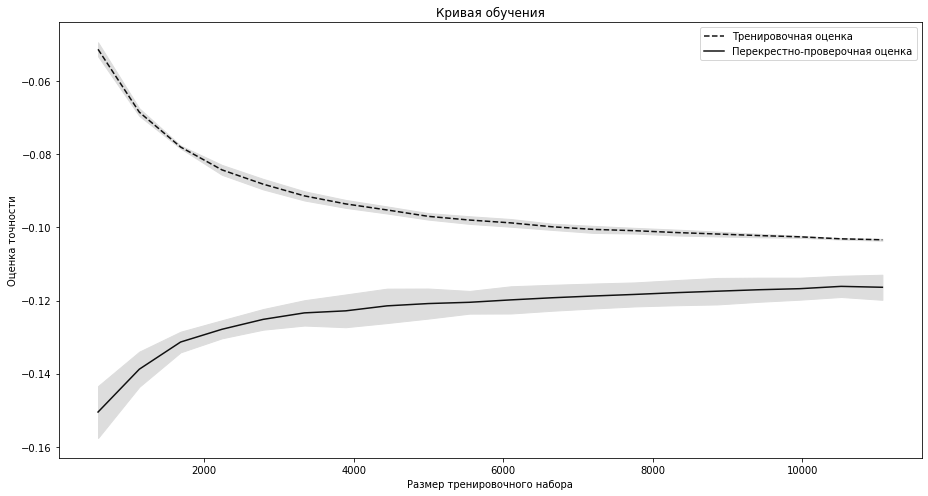

In [23]:
plt.figure(figsize = (13, 7))
plt.plot(train_sizes, train_mean, '--', color = "#111111",
         label = "Тренировочная оценка")
plt.plot(train_sizes, test_mean, color = "#111111",
         label = "Перекрестно-проверочная оценка")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

plt.title("Кривая обучения")
plt.xlabel("Размер тренировочного набора")
plt.ylabel("Оценка точности")
plt.legend(loc = "best")
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

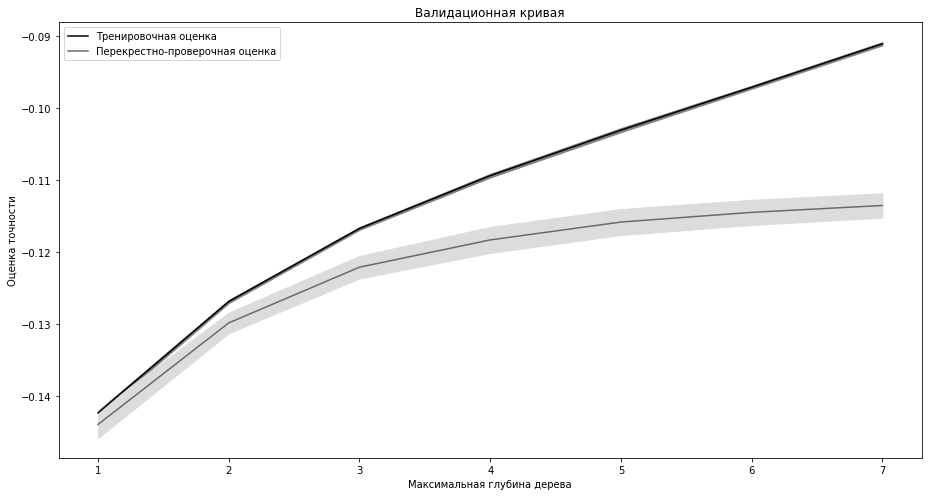

In [24]:
shuffle_split = ShuffleSplit(n_splits = 5, test_size = 0.15, random_state = 0)
param_range = np.arange(1, 8, 1)

train_scores, test_scores = validation_curve(
                                             catb,
                                             X, 
                                             Y,
                                             cv = shuffle_split,
                                             scoring = 'neg_root_mean_squared_error',
                                             param_name = "max_depth",
                                             param_range = param_range,
                                             n_jobs = -1,
                                             #verbose = 1
                                            )

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.figure(figsize = (13, 7))
plt.plot(param_range, train_mean, color = "black",
         label = "Тренировочная оценка")
plt.plot(param_range, test_mean, color = "dimgrey",
         label = "Перекрестно-проверочная оценка")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color = "gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color = "gainsboro")

plt.title("Валидационная кривая")
plt.xlabel("Максимальная глубина дерева")
plt.ylabel("Оценка точности")
plt.legend(loc = "best")
plt.tight_layout()
plt.show